# Week 1 Inroduction

This is an unassessed coursework to help you learn some key Python features that you will undoubtedly need at some point during this module.
For those of you who haven't used Python before please work through [Intro-to-Python](https://gitlab.erc.monash.edu.au/andrease/Python4Maths/-/tree/master/Intro-to-Python) gitlab notebooks they provide excellent introduction to Python.
From 00-07 will be more than sufficient to get you used to Python and of course it will be better if you did more.
And for those who have previous Python experience feel free to skip them.

This coursework should be worked on during the scheduled tutorial sessions where you can ask questions if you get stuck.

In [2]:
import numpy as np
import cv2
import matplotlib.image as mpimg
from matplotlib import pyplot as plt

%matplotlib inline
#to visualize the plots within the notebook

## Task 1. Basic loading and displaying
In this task you will learn how to load, display and convert to gray scale RGB images.
### 1.1 Display image
Download a color image and place it in the images' folder if you like or use the images already there.
Now load the image and display it but be careful as different loading functions can represent images in a different datatype or different channels order.

`Hint: images in python can be though of as a multidimentional array`

[[[191 171 108]
  [157 137  74]
  [168 148  85]
  ...
  [132 103  35]
  [137 108  38]
  [147 118  48]]

 [[191 171 108]
  [158 138  75]
  [168 148  85]
  ...
  [131 102  32]
  [135 106  36]
  [143 114  44]]

 [[188 168 105]
  [155 135  72]
  [168 147  82]
  ...
  [132 103  35]
  [135 106  36]
  [140 111  41]]

 ...

 [[173 159 133]
  [141 127 101]
  [166 150 124]
  ...
  [135 115  90]
  [154 134 109]
  [135 117  93]]

 [[168 154 127]
  [131 117  90]
  [151 136 107]
  ...
  [159 139 114]
  [156 136 111]
  [185 165 141]]

 [[192 178 151]
  [141 127 100]
  [138 123  94]
  ...
  [175 155 130]
  [182 162 137]
  [194 174 149]]]


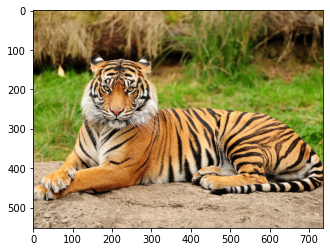

In [3]:
img = mpimg.imread("../images/tiger.jpg")
plt.imshow(img)
print(img)

Play a bit with the image and understand how the images are represented in Python for example try:
- Printing the shape
- Try accessing image channels
- Display each channel separately
- Swap the channels and display the image

Did you notice any differences when you swapped the channels? or visualized only one channel ata time?

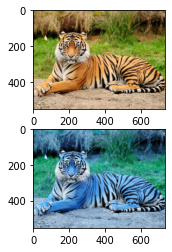

In [4]:
_, [ax1, ax2] = plt.subplots(2, 1)
ax1.imshow(img)
ax2.imshow([[[c[2], c[1], c[0]] for c in r] for r in img])

### 1.2 Convert to gray scale
`Hint: try using cvtColor from openCV packge`

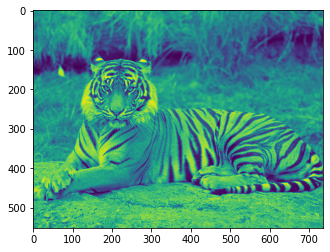

In [5]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img)

Try writing your oen method to convert RGB images to gray scale.

In [6]:
def to_gray(img):
    '''
    Convert and RGB image into gray scale
    :param img: RBG image with size HxWx3
    :return: gray scaled image of size HxW
    '''
    assert len(img.shape) == 3, f'Wrong input image dimensions, we expected an input of size HxWxC instead we got {img.shape}'
    h,w,c = img.shape
    gray_img = np.array([[c.mean() for c in r] for r in img])

    assert gray_img.shape == (h,w), 'Wrong spacial dimensions, your method should only change the channel dimension'
    return gray_img

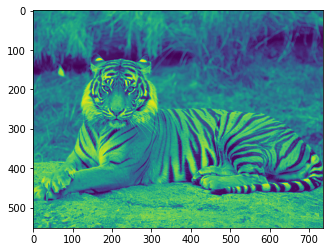

In [7]:
plt.imshow(to_gray(img))

## More advanced basics
Now we have learned how to load and display images, and we have some information about how Python represent images we can do more advance image manipulations.

### 2.1 Transpose
Flip the image across its diagonal.

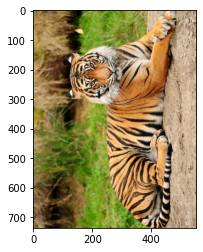

In [8]:
transposed_img = img.transpose(1,0,2)

plt.imshow(transposed_img)

### 2.2 Split the image
Split the image into four equal parts and display each of them.
You can display each of them separately or preferably in a single plot using `subplots`.

In [9]:
h, w, _ = img.shape
first_part = img[0:h//2, 0:w//2]
second_part = img[0:h//2, w//2:]
third_part = img[h//2:, 0:w//2]
fourth_part = img[h//2:, w//2:]

fig, axes = plt.subplots(2, 2)
axes[0,0].imshow(first_part)
axes[0,1].imshow(second_part)
axes[1,0].imshow(third_part)
axes[1,1].imshow(fourth_part)

## Scaling and loops
Use openCV python routines to scale down the image and plot them side by side with the full scaled image.
Write your own function to scale down the image using an average of 4 pixels.

In [10]:
scaled_img = img # replace this part

_, axes = plt.subplots(2,1)
axes[0].imshow(img)
axes[1].imshow(cv2.resize(img, [img.shape[1]//2, img.shape[0]//2]))

In [1]:
def average_scale_down(img):
    '''
    Scale down and RGB image
    :param img: RBG image with size HxWx3
    :return: scaled_img: RBG scaled down image with size (H/4)x(W/4)x3
    '''
    assert len(img.shape) == 3, f'Wrong input image dimensions, we expected an input of size HxWxC instead we got {img.shape}'
    h,w,c = img.shape
    scaled_img = img # Modify this part to convert the image onto gray scale

    assert scaled_img.shape == (h//2,w//2, 3), f'Wrong spacial dimensions, your method should reduce the spacial dimensions by a factor of four we expect {(h//2,w//2, 3)} instead we have {scaled_img.shape}'
    return scaled_img

Similarly, how can you double the size of an image?
What sort of artefacts are visible if you do so?
Try and code this out yourself.

### Advanced
Nested loops can take a lot of time you may already noticed, rewrite your scale down function without using loops.

`Hint: make use of extrcat 2d pathes in sklearn alredy impelemnted for you in utils`

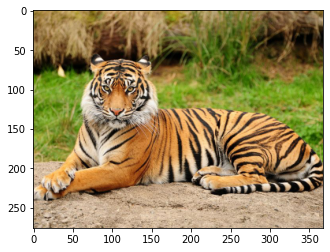

In [21]:
from sklearn.feature_extraction.image import extract_patches_2d
patches = extract_patches_2d(img, (2,2))
patches = patches.reshape((img.shape[0]-1, img.shape[1]-1, 2, 2, img.shape[2]))
result_img = patches[::2,::2].mean((2,3)).astype(np.ubyte)
plt.imshow(result_img)